In [1]:
import codecs
import math as m
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

#Constantes

G = 6.67e-11

#Tierra

m_T = 5.9736e24
r_T = 6.3781e6

#Luna

m_L = 0.07349e24
r_L = 1.7374e6
d = 3.844e8
delta = G*m_T / d**3
mu = m_L / m_T
omega = 2.6617* 10**(-6)
h = 1
t = np.arange(0, np.pi/omega, h*100)
phiL = t*omega
xL = d*np.cos(phiL)
yL = d*np.sin(phiL)

#Nave

v0 = np.sqrt(2*G*m_T/r_T)/d
r, phi, p_r, p_phi = [], [], [], []


In [2]:
#Funciones
   
def P_phi(t, r, phi):
    rp = np.sqrt(1 + r**2 - 2*r*np.cos(phi-omega*t))
    return -delta*mu*r*np.sin(phi - omega*t)/ rp**3
    
def P_r(t, r, phi, p_phi):
    rp = np.sqrt(1 + r**2 - 2*r*np.cos(phi-omega*t))
    return (p_phi**2 / r**3) - (delta/r**2) + (delta*mu*(r-np.cos(phi - omega*t)) / rp**3)

def Phi(r, p_phi):
    return p_phi / r**2

def R(p_r):
    return p_r

In [3]:
#Runge-kutta
    
def rk4(f1, f2, f3, f4, h, *args):
    r0, phi0, pr0, pphi0, tL, t0, tf = args[0], args[1], args[2], args[3], args[4], args[5], args[6]
    r, phi, p_r, p_phi = [r0], [phi0], [pr0], [pphi0]
    for t in tL:
        if t>t0 and t<tf:
            a1 = h*f1(t, r0, phi0)
            a2 = h*f1(t + h/2, r0 + a1/2, phi0 + a1/2)
            a3 = h*f1(t + h/2, r0 + a2/2, phi0 + a2/2)
            a4 = h*f1(t+h,  r0 + a3, phi0 + a3)
            b1 = h*f2(t, r0, phi0, pphi0)
            b2 = h*f2(t + h/2, r0 + b1/2, phi0 + b1/2, pphi0 + b1/2)
            b3 = h*f2(t + h/2, r0 + b2/2, phi0 + b2/2, pphi0 + b2/2)
            b4 = h*f2(t+h, r0 + b3, phi0 + b3, pphi0 + b3)
            c1 = h*f3(r0, pphi0)
            c2 = h*f3(r0 + c1/2, pphi0 + c1/2)
            c3 = h*f3(r0 + c2/2, pphi0 + c2/2)
            c4 = h*f3(r0 + c3, pphi0 + c3)
            d1 = h*f4(pr0)
            d2 = h*f4(pr0 + d1/2)
            d3 = h*f4(pr0 + d2/2)
            d4 = h*f4(pr0 + d3)
            pphi0 = pphi0 + (a1 + 2*a2 + 2*a3 + a4)/6
            pr0 = pr0 + (b1 + 2*b2 + 2*b3 + b4)/6
            phi0 = phi0 + (c1 + 2*c2 + 2*c3 + c4)/6
            r0 = r0 + (d1 + 2*d2 + 2*d3 + d4)/6
            p_phi.append(pphi0)
            p_r.append(pr0)
            phi.append(phi0)
            r.append(r0)
        else:
            p_phi.append(pphi0)
            p_r.append(pr0)
            phi.append(phi0)
            r.append(r0)
    return r, phi, p_r, p_phi

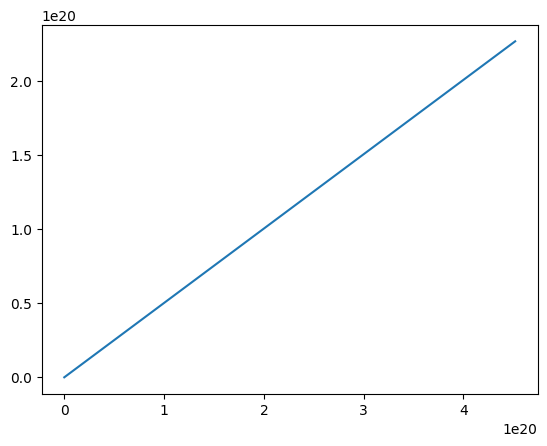

In [4]:
#Evaluar condiciones iniciales

p0 = [v0, 0]

pos = []
ang = 0.465
'''
for j in range(10):
    r, phi, p_r, p_phi = rk4(P_phi, P_r, Phi, R, h, r_T/d, ang, p0[0], p0[1], t)
    pos = [i for i in range(len(r)) if m.isclose(r[i], d, rel_tol=1)]
    ang = np.mean(np.array([np.arctan(yL[i]/xL[i]) for i in pos]))
'''

r, phi, p_r, p_phi = rk4(P_phi, P_r, Phi, R, h*100, r_T/d, ang, p0[0], p0[1], t, 0, np.pi/(2*omega))
x = [r[i]*d*np.cos(phi[i]) for i in range(len(r))]
y = [r[i]*d*np.sin(phi[i]) for i in range(len(r))]

xL_0 = xL[::10]
yL_0 = yL[::10]
x_0 = x[::10]
y_0 = y[::10]

plt.plot(x, y)

MovieWriter ffmpeg unavailable; using Pillow instead.


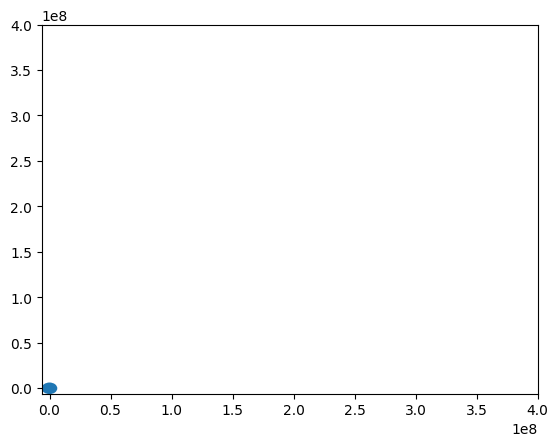

In [5]:
ancho = 4e8
def frame(i):
    ax.cla()
    plt.xlim(-r_T, ancho)
    plt.ylim(-r_T, ancho)
    T = Circle((0, 0), r_T)
    L = Circle((xL_0[i], yL_0[i]), r_L)
    N = Circle((x_0[i], y_0[i]), r_L)
    ax.add_patch(T)
    ax.add_patch(L)
    ax.add_patch(N)

fig, ax = plt.subplots()
anim = FuncAnimation(fig, frame, frames=len(x_0), interval=50)
anim.save('animacion.gif')
with open('animacion.html', 'w') as f:
    f.write(anim.to_jshtml())